In [7]:
import pandas as pd

# Charger les données dans un DataFrame
df = pd.read_csv('C:/Users/pc/Desktop/mastere/spamemail/archive/Spam_Ham_data.csv')

# Afficher les premières lignes du DataFrame
df.head()

df

,email,label,Subject,content
0,b'From exmh-workers-admin@redhat.com Thu Aug ...,0.0,new sequenc window,date wed number aug number number number chri ...
1,b'Return-Path: <Online#3.19578.34-UgGTgZFN19NA...,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,b'Return-Path: <Online#3.19584.83-p1SYlJ1blFvQ...,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,b'From Steve_Burt@cursor-system.com Thu Aug 2...,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,b'Return-Path: <Online#3.19586.b5-9w0blztbvHPd...,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...
...,...,...,...,...
3058,b'From 2002biz2biz2513@Flashmail.com Mon Oct ...,1.0,fwddirect market work number,stumbl greatest way market centuri undoubtedli...
3059,b'From biz2biz2446@Flashmail.com Mon Oct 7 2...,1.0,see compani sale sky rocket number,stumbl greatest way market centuri undoubtedli...
3060,b'From bounce2@u-answer.com Tue Oct 8 11:02:...,1.0,number hour watch emmerci joke,frontpag numbermeta nameprogid vlinknumb align...
3061,b'From beautyinfufuxxxmeb13mxy@aol.com Tue Oc...,1.0,make fortun ebay number,htmlbodi tr td p number rate work home busi bf...


# Approche 1 : Arbre de desision 

In [9]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   -----------------------

In [9]:
# Import des bibliothèques
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz

# Fonction pour charger les données
def load_data(directory):
    data = []
    labels = []
    for root, _, files in os.walk(directory):
        for file in files:
            with open(os.path.join(root, file), 'r', encoding='latin1') as f:
                data.append(f.read())
                labels.append(os.path.basename(root))
    return data, labels

# Chargement des données
data, labels = load_data('C:/Users/pc/Desktop/mastere/spamemail/archive')

# Création d'un DataFrame
df = pd.DataFrame({'text': data, 'label': labels})

# Extraction des caractéristiques
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = np.array(df['label'])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle d'arbre de décision
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = tree_clf.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Export de l'arbre de décision
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=vectorizer.get_feature_names_out(),
                           class_names=tree_clf.classes_,
                           filled=True, rounded=True, special_characters=True)

# Affichage de l'arbre de décision
graph = graphviz.Source(dot_data)
graph.render("spamassassin_tree1")  # Sauvegarder l'arbre dans un fichier PDF
graph.view()  # Afficher l'arbre dans Jupyter

Accuracy: 0.9803328290468987

Classification Report:
               precision    recall  f1-score   support

     archive       1.00      0.00      0.00         1
         ham       0.99      0.99      0.99       562
        spam       0.93      0.94      0.93        98

    accuracy                           0.98       661
   macro avg       0.97      0.64      0.64       661
weighted avg       0.98      0.98      0.98       661



'spamassassin_tree1.pdf'

# Approche 2 : CNN

In [3]:
!pip install tensorflow scikit-learn pandas

In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report

# Fonction pour charger les données et extraire un sous-ensemble aléatoire
def load_data(directory, subset_size):
    data = []
    labels = []
    for root, _, files in os.walk(directory):
        for file in files:
            with open(os.path.join(root, file), 'r', encoding='latin1') as f:
                data.append(f.read())
                labels.append(os.path.basename(root))
    # Convertir les listes en DataFrame
    df = pd.DataFrame({'text': data, 'label': labels})
    # Échantillonner un sous-ensemble aléatoire des données
    df_subset = df.groupby('label').apply(lambda x: x.sample(frac=subset_size))
    return df_subset['text'].values, df_subset['label'].values

# Charger les données et extraire un sous-ensemble aléatoire
data, labels = load_data('C:/Users/pc/Desktop/mastere/spamemail/archive', subset_size=0.5)

# Encoder les étiquettes en numériques
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
X = tokenizer.texts_to_sequences(data)
max_len = max([len(x) for x in X])
X = pad_sequences(X, maxlen=max_len)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Création du modèle CNN
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Prédictions sur l'ensemble de test
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 122s 5s/step - accuracy: 0.7740 - loss: 0.5214 - val_accuracy: 0.8697 - val_loss: 0.2420
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 110s 5s/step - accuracy: 0.8533 - loss: 0.2877 - val_accuracy: 0.9667 - val_loss: 0.1353
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 115s 5s/step - accuracy: 0.9654 - loss: 0.1424 - val_accuracy: 0.9788 - val_loss: 0.0700
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.9912 - loss: 0.0650 - val_accuracy: 0.9818 - val_loss: 0.0401
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.9976 - loss: 0.0257 - val_accuracy: 0.9879 - val_loss: 0.0277
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.9899 - loss: 0.0318
Test Accuracy: 0.9878787994384766
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       287
           1       0.98      0.93      0.95        43

    accuracy                     

# Approche 4 : k-means

Centres des clusters :
 [[1.80234900e-02 4.76904729e-03 1.45259102e-02 ... 4.00973211e-06
  0.00000000e+00 0.00000000e+00]
 [1.95821701e-02 1.68091776e-03 4.87142852e-03 ... 0.00000000e+00
  7.79377323e-05 7.79377323e-05]]
Silhouette Score moyen : 0.04977932780783682
Distance moyenne pour le cluster 1 : 0.9488686161633828
Distance moyenne pour le cluster 2 : 0.8149186882944838


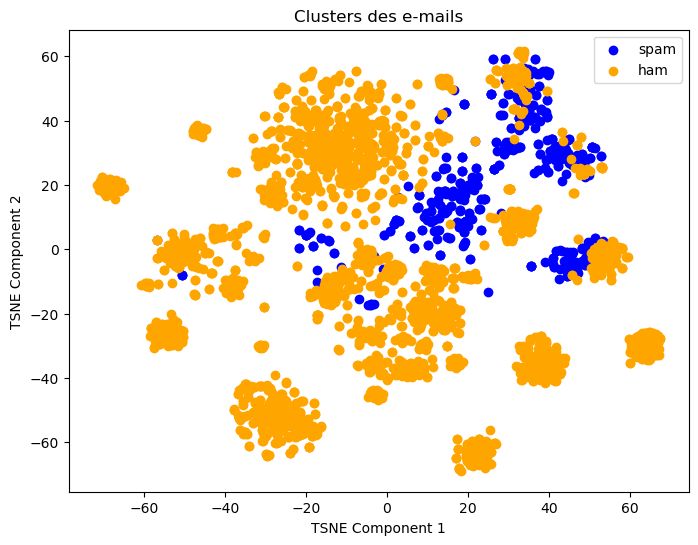

In [12]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Fonction pour charger les e-mails d'un dossier avec les étiquettes de classe
def load_emails_with_labels(folder, label):
    emails = []
    labels = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        with open(filepath, 'r', encoding='latin-1') as file:
            content = file.read()
            emails.append(content)
            labels.append(label)
    return emails, labels

# Charger les e-mails spam et non-spam avec les étiquettes de classe
spam_folder = r"C:\Users\pc\Desktop\spamemail\archive\spam\spam"
non_spam_folder = r"C:\Users\pc\Desktop\spamemail\archive\ham\ham"

spam_emails, spam_labels = load_emails_with_labels(spam_folder, 'spam')
non_spam_emails, non_spam_labels = load_emails_with_labels(non_spam_folder, 'ham')

# Concaténer les données et les étiquettes
emails = spam_emails + non_spam_emails
labels = spam_labels + non_spam_labels

# Vectorisation des données textuelles
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(emails)

# Définir le nombre de clusters (k) pour K-means
k = 2

# Créer et ajuster le modèle K-means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Afficher les centres des clusters
print("Centres des clusters :\n", kmeans.cluster_centers_)

# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score moyen :", silhouette_avg)

# Calculer les distances moyennes pour chaque cluster
distances = euclidean_distances(X, kmeans.cluster_centers_)
avg_distances = []
for i in range(k):
    avg_distance = np.mean(distances[kmeans.labels_ == i, i])
    avg_distances.append(avg_distance)
    print(f"Distance moyenne pour le cluster {i+1} :", avg_distance)

# Réduire la dimensionnalité des données avec t-SNE
tsne = TSNE(n_components=2, random_state=42, init="random")  # Utilisation de l'initialisation aléatoire
X_tsne = tsne.fit_transform(X.toarray())  # Conversion de la matrice creuse en matrice dense

# Tracer les clusters en colorant les points selon leur classe
plt.figure(figsize=(8, 6))
for label, color in zip(['spam', 'ham'], ['blue', 'orange']):
    cluster_points = X_tsne[np.array(labels) == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=label, color=color)
plt.title("Clusters des e-mails")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend()
plt.show()


# Approche 3 : Foret de isolation 

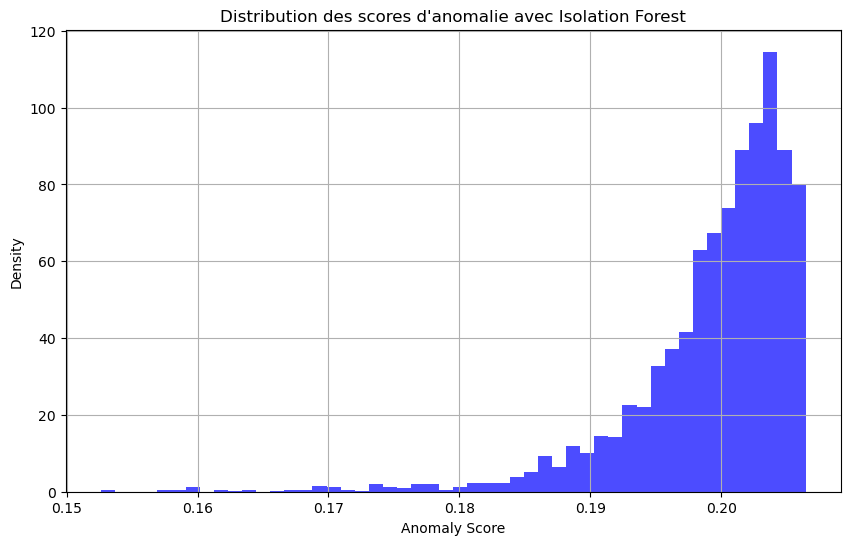

Scores d'anomalie pour les 10 premiers exemples :
Exemple 1 : 0.1890078677729563
Exemple 2 : 0.20292868727314722
Exemple 3 : 0.20259402105585073
Exemple 4 : 0.20072143572454654
Exemple 5 : 0.19093969855077114
Exemple 6 : 0.20118758760346267
Exemple 7 : 0.19422504342303176
Exemple 8 : 0.20390859946800333
Exemple 9 : 0.2011532961081995
Exemple 10 : 0.19842776390795136


In [11]:
#!/usr/bin/env python
# coding: utf-8

# In[8]:


import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest

# Fonction pour charger les e-mails d'un dossier
def load_emails(folder):
    emails = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        with open(filepath, 'r', encoding='latin-1') as file:
            content = file.read()
            emails.append(content)
    return emails


# Chemin vers les dossiers contenant les e-mails spam et non-spam
spam_folder = r"C:\Users\pc\Desktop\spamemail\archive\spam\spam"
non_spam_folder = r"C:\Users\pc\Desktop\spamemail\archive\ham\ham"

# Charger les e-mails spam et non-spam
spam_emails = load_emails(spam_folder)
non_spam_emails = load_emails(non_spam_folder)

# Concaténer les données
emails = spam_emails + non_spam_emails

# Vectorisation des données textuelles
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(emails)

# Entraînement du modèle Isolation Forest
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X)

# Prédiction des anomalies (outliers)
anomaly_scores = isolation_forest.decision_function(X)

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, density=True, alpha=0.7, color='b')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Distribution des scores d\'anomalie avec Isolation Forest')
plt.grid(True)
plt.show()


# In[17]:


print("Scores d'anomalie pour les 10 premiers exemples :")
for i, score in enumerate(anomaly_scores[:10]):
    print(f"Exemple {i+1} : {score}")
